In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
sys.path.append("../")
sys.path.append("../../")

import analysis_utils as tools

In [2]:
methods = ["superspike", "stochasticsuperspike"]
dataset = "oxford"

nb_epochs = 1500
logging_freq = 500

epochs = [e-1 for e in range(logging_freq, nb_epochs+1, logging_freq)]
print(epochs)

[499, 999, 1499]


In [3]:
path = "../experiments/Runs/{}/dataset=oxford/Example/data"

colors = {
    "stochasticsuperspike": "#EBB400",
    "superspike": "#008ca5"
}
names = {
    "stochasticsuperspike": "stochastic",
    "superspike": "deterministic"
}

data_path = "../experiments/dataset/{}.png".format(dataset)

No data for superspike
No data for stochasticsuperspike


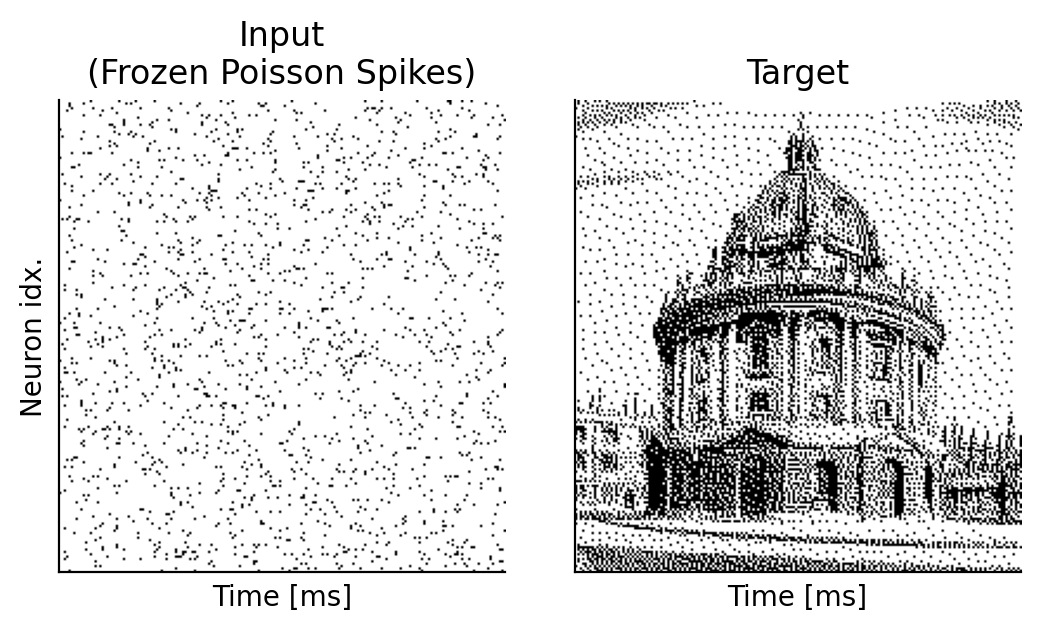

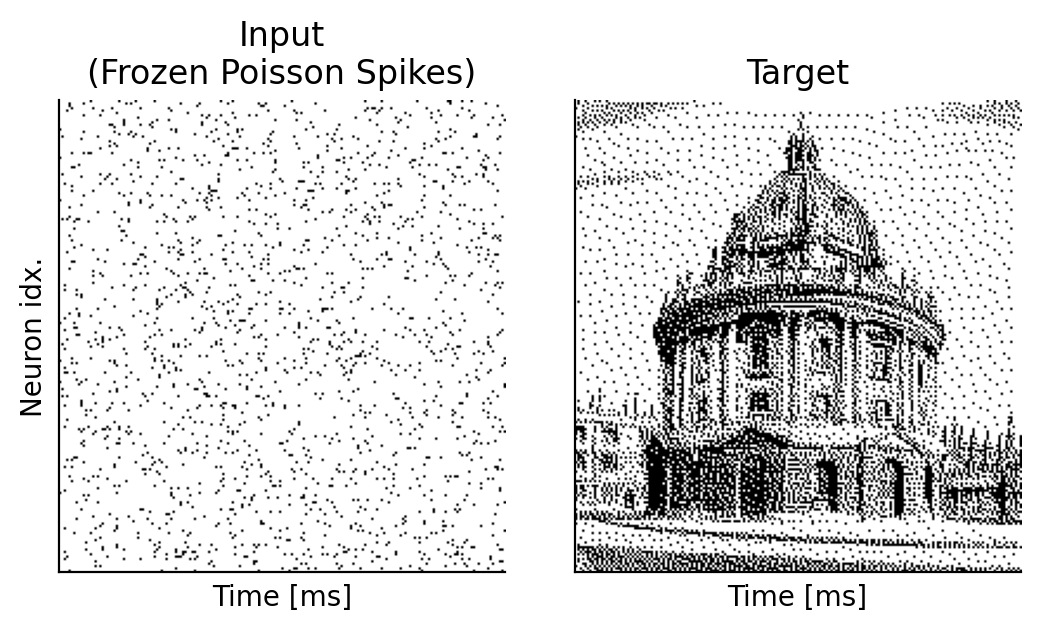

In [4]:
x_datas = {}
for method in methods:

    try:

        z_data = np.load(os.path.join(path.format(method), "z_data.npy"))

        x_data = np.load(os.path.join(path.format(method), "x_data.npy"))
        x_datas[method] = x_data

        fig, ax = plt.subplots(1,2, figsize=(5.5,3), dpi=200, sharex=True, sharey=True)
        ax[1].imshow(np.transpose(z_data[0]), cmap=plt.cm.gray_r, aspect="equal")
        ax[0].imshow(np.transpose(x_data[0]), cmap=plt.cm.gray_r, aspect="equal")

        ax[0].set_xticks([])
        ax[0].set_yticks([])

        ax[0].set_ylabel("Neuron idx.")
        ax[0].set_xlabel("Time [ms]")
        # ax[1].set_ylabel("Neuron idx.")
        ax[1].set_xlabel("Time [ms]")

        ax[1].set_title("Target")
        ax[0].set_title("Input\n(Frozen Poisson Spikes)")


        plt.tight_layout()
        sns.despine()

        input_firing_rate = np.sum(x_data[0])/x_data[0].shape[0]/x_data[0].shape[1]/dt
        print("Input firing rate: {} Hz".format(input_firing_rate))
        output_firing_rate = np.sum(z_data[0])/z_data[0].shape[0]/z_data[0].shape[1]/dt
        print("Output firing rate: {} Hz".format(output_firing_rate))

        print(z_data[0].shape)
    except:
        print("No data for {}".format(method))

In [5]:
spk_h_0 = {}
spk_h_last = {}
spk_o_0 = {}
spk_o_last = {}

for method in methods:
    print(method)
    p = path.format(method)


    spk_h_0[method] = np.load(os.path.join(p, "spk_hist_h_{}.npy").format(logging_freq-1))[0]
    spk_h_last[method] = np.load(os.path.join(p, "spk_hist_h_{}.npy".format(nb_epochs-1)))[-1]

    spk_o_0[method] = np.load(os.path.join(p, "spk_hist_o_{}.npy").format(logging_freq-1))[0]
    spk_o_last[method] = np.load(os.path.join(p, "spk_hist_o_{}.npy".format(nb_epochs-1)))[-1]


superspike
stochasticsuperspike


In [6]:
spk_o_last["stochasticsuperspike"].shape

(10, 1, 189, 200)

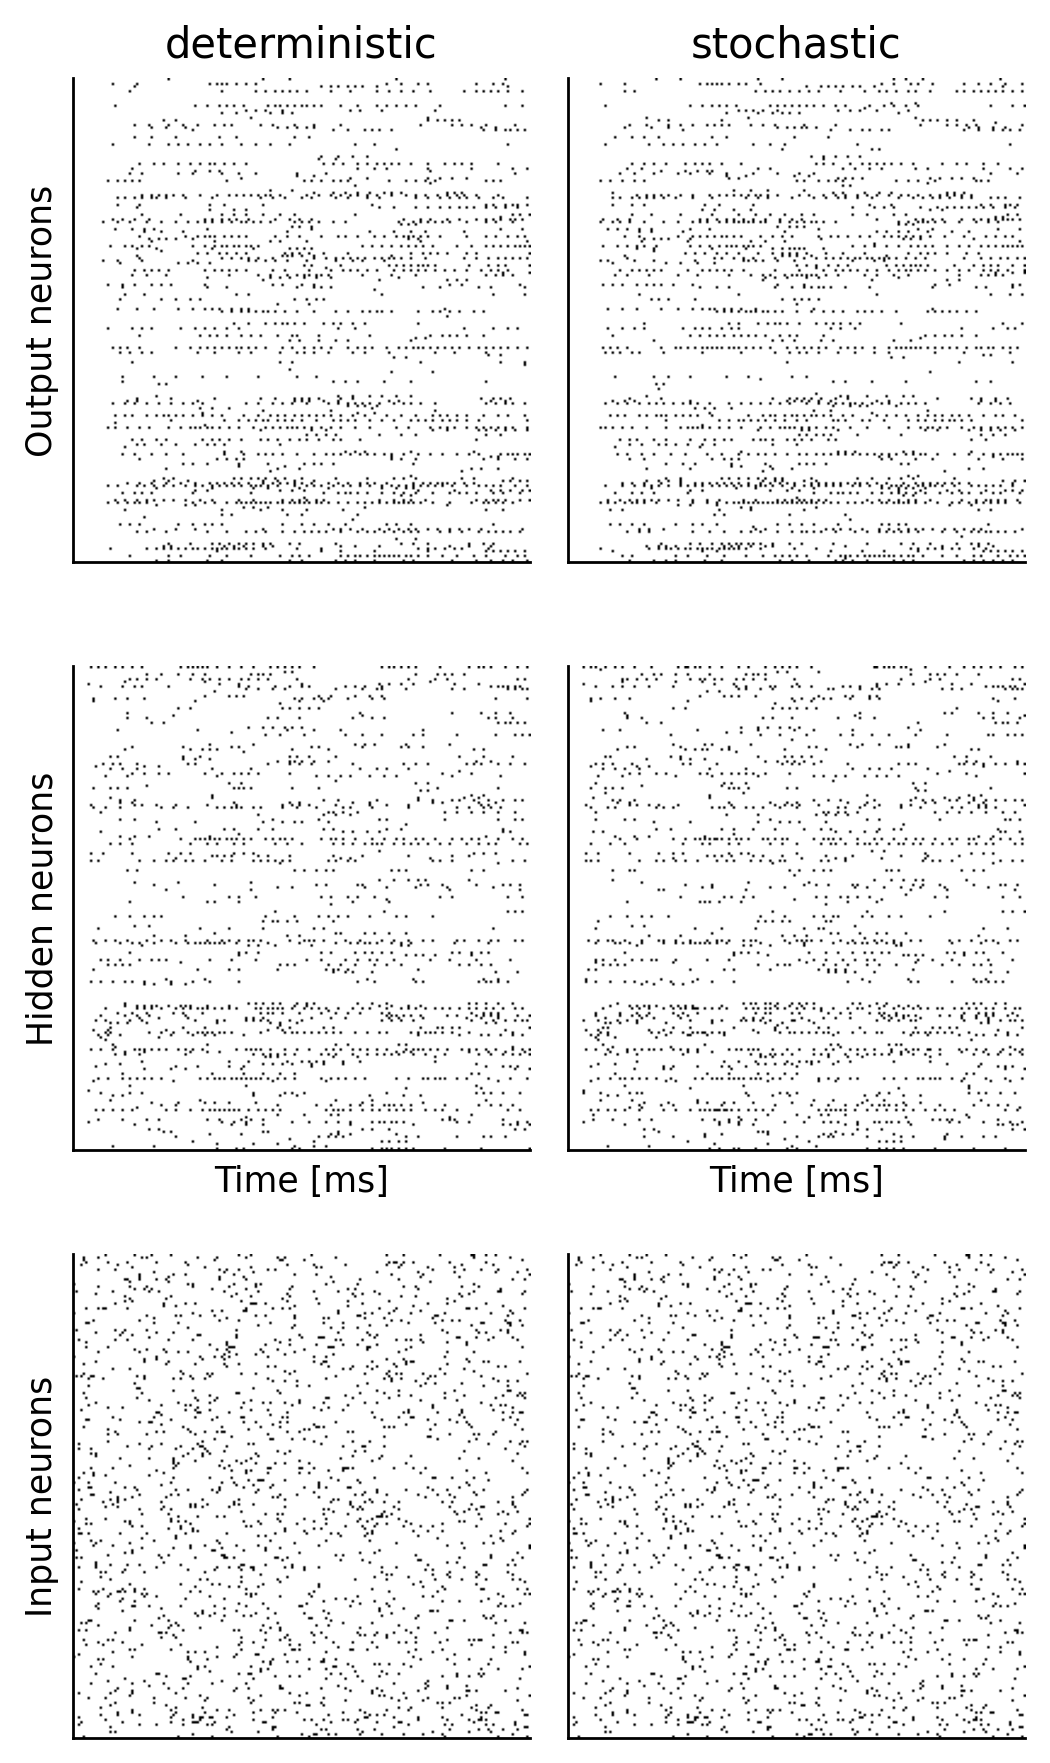

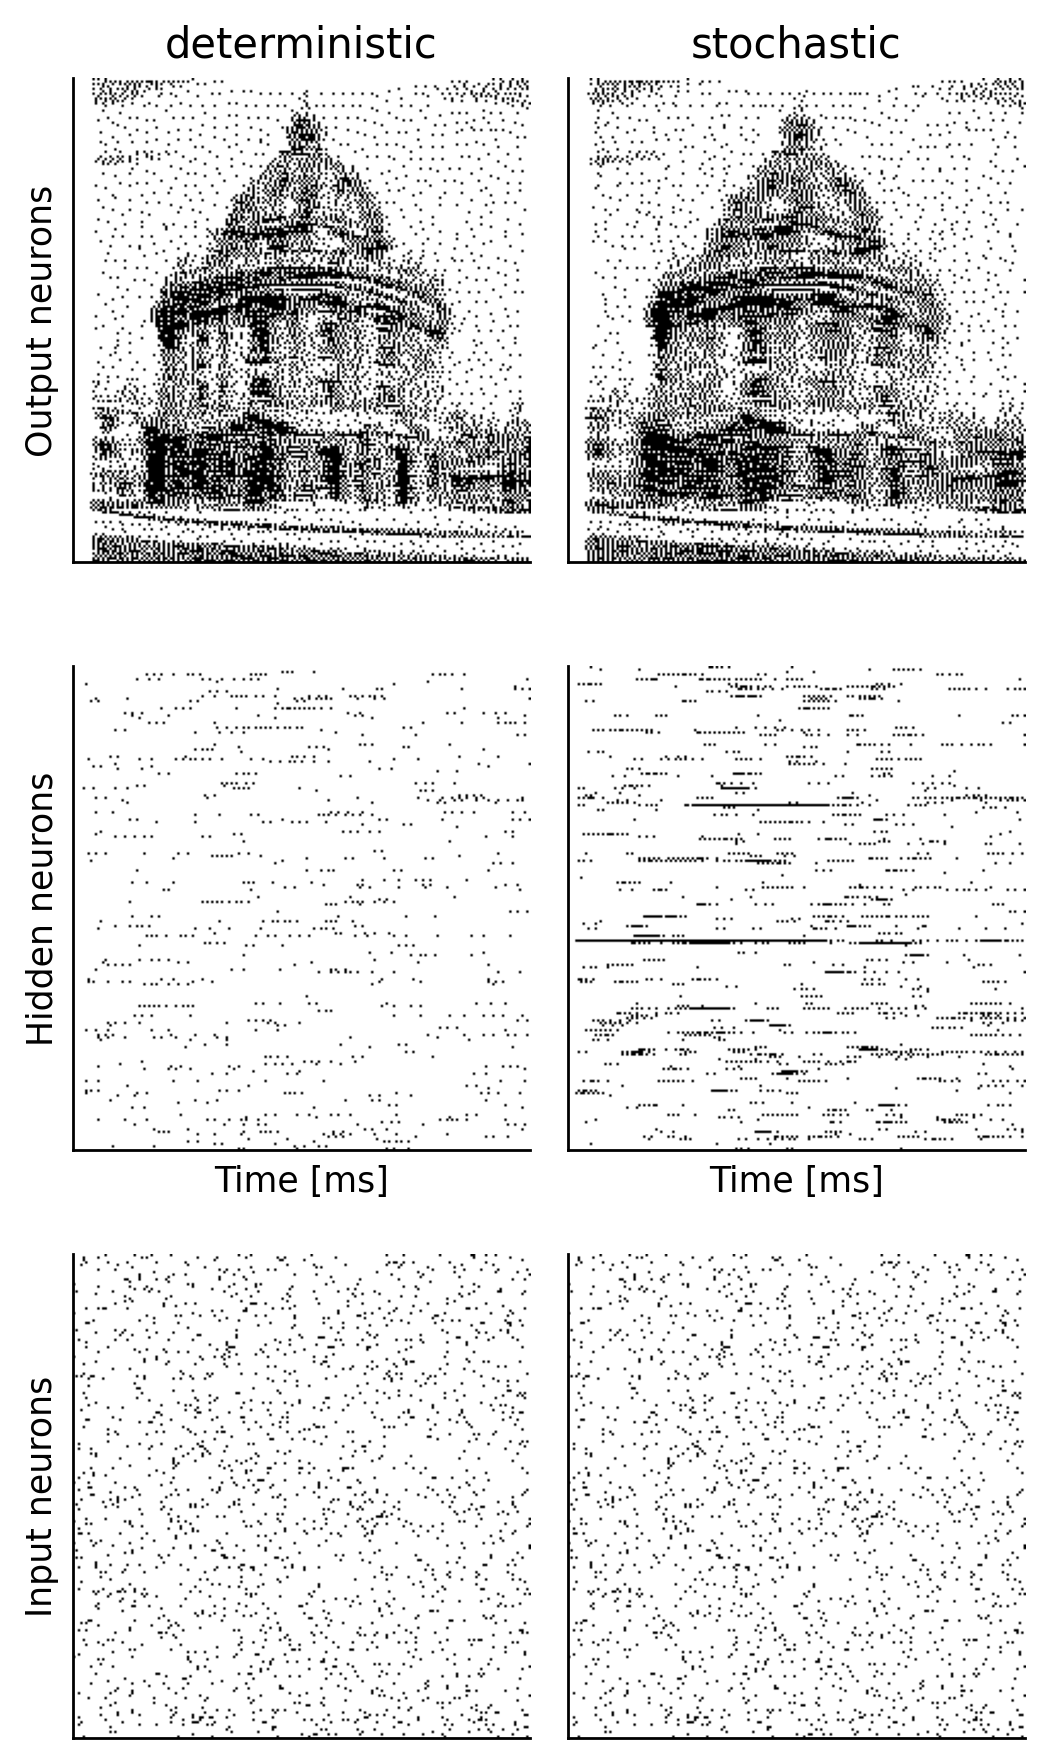

In [7]:
tools.plot_spikes_epochs(x_datas, spk_h_0, spk_o_0, methods, names)
plt.savefig("Plots/before_training.svg")
tools.plot_spikes_epochs(x_datas, spk_h_last, spk_o_last, methods, names)
plt.savefig("Plots/after_training.svg")
plt.show()